In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
class FeedforwardNeuralNetModel(nn.Module):
  def __init__(self):
    super(FeedforwardNeuralNetModel, self).__init__()

    self.fc1 = nn.Linear(76, 32)
    self.relu1 = nn.ReLU()
    self.bn1 = nn.BatchNorm1d(32)

    self.fc2 = nn.Linear(32, 16)
    self.relu2 = nn.ReLU()
    self.bn2 = nn.BatchNorm1d(16)

    self.fc3 = nn.Linear(16, 8)
    self.relu3 = nn.ReLU()
    self.bn3 = nn.BatchNorm1d(8)

    self.fc4 = nn.Linear(8, 1)  

  def forward(self, x):
    out = self.fc1(x)
    out = self.bn1(out)
    out = self.relu1(out)

    out = self.fc2(out)
    out = self.relu2(out)
    out = self.bn2(out)

    out = self.fc3(out)
    out = self.relu3(out)
    out = self.bn3(out)
    
    out = self.fc4(out)
    return out

In [4]:
X = pd.read_csv('drive/MyDrive/asset_pricing_data/full_predictor_set_bfill.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
X.shape

(2187349, 78)

In [5]:
y = pd.read_csv('drive/MyDrive/asset_pricing_data/returns.csv', index_col=0)
y["return"] = y["return"].where(y["return"] <= 0.2, 0.2)
y["return"] = y["return"].where(y["return"] >= -0.2, -0.2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
y.shape

(2187349, 3)

In [45]:
df1_train = X[(X["level_1"] >= 198000) & (X["level_1"] < 201400)].iloc[:,2:]
df1_val = X[(X["level_1"] >= 201400) & (X["level_1"] < 201700)].iloc[:,2:]
df1_test = X[X["level_1"] >= 201700].iloc[:,2:]
df2_train = y[(y["level_1"] >= 198000) & (y["level_1"] < 201400)].iloc[:,2]
df2_val = y[(y["level_1"] >= 201400) & (y["level_1"] < 201700)].iloc[:,2]
df2_test = y[y["level_1"] >= 201700].iloc[:,2]

tx_train = torch.tensor(df1_train.values.astype(np.float32))
tx_val = torch.tensor(df1_val.values.astype(np.float32))
tx_test = torch.tensor(df1_test.values.astype(np.float32))
ty_train = torch.tensor(df2_train.values.astype(np.float32))
ty_val = torch.tensor(df2_val.values.astype(np.float32))
ty_test = torch.tensor(df2_test.values.astype(np.float32))

train_set = torch.utils.data.TensorDataset(tx_train, ty_train)
val_set = torch.utils.data.TensorDataset(tx_val, ty_val)
test_set = torch.utils.data.TensorDataset(tx_test, ty_test)
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = 64, shuffle = True)
val_loader = torch.utils.data.DataLoader(dataset = val_set, batch_size = 32, shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = 32, shuffle = False)

In [7]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.90.145.138:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.90.145.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.90.145.138:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [47]:
with tpu_strategy.scope():
  model = FeedforwardNeuralNetModel()
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  #scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)

In [61]:
j = 0
epsilon = np.inf
params = None
val_MSEs = []
for epoch in range(100):

  model.train()
  if j <= 5:
    for i,(pred, ret) in enumerate(train_loader):
      optimizer.zero_grad()

      # pred = pred.to(device)
      # ret = ret.to(device)

      outputs = model(pred)

      loss = criterion(outputs, ret)

      l1_norm = sum(p.abs().sum() for p in model.parameters())
      loss = loss + 0.0001 * l1_norm
      loss.backward()

      optimizer.step()
    
    model.eval()
    with torch.no_grad():
      total_loss = 0.0
      for i,(pred, ret) in enumerate(val_loader):
        outputs = model(pred)
        total_loss = total_loss + torch.sum(torch.square(outputs-ret))

      val_MSEs.append(total_loss)
      if total_loss < epsilon:
        j = 0
        epsilon = total_loss
        params = model.state_dict()
      else:
        j = j + 1

  #if j <= 5:
  #  scheduler.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [62]:
model2 = FeedforwardNeuralNetModel()
model2.load_state_dict(params)
model2.eval()

SS = 0.0
SSE = 0.0

with torch.no_grad():
  for i,(pred,ret) in enumerate(test_loader):
    outputs = model2(pred)
    SS = SS + torch.sum(torch.square(ret))
    SSE = SSE + torch.sum(torch.square(outputs-ret))
print(1 - (SSE/SS))
print(SSE/df1_test.shape[0])

tensor(-30.8481)
tensor(0.2773)


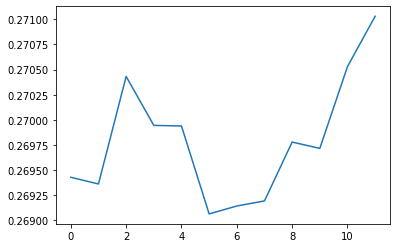

In [63]:
plt.plot(np.array(val_MSEs)/df1_val.shape[0])